## Exercicio 5 
Ana Moreira \
Damião Goes

In [43]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # For plotting
import scikit_posthocs as sp
import statsmodels.stats as stm
from statsmodels.graphics.gofplots import qqplot 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import math

#### Preparação dos dados

In [44]:

df = pd.read_csv(r'C:\Users\Damião\Desktop\Isa\Mestrado\2_semestre\Avdcaa\greends-avcad-2024\greends-avcad-2024\examples\EFIplus_medit.zip', compression='zip', sep=";")

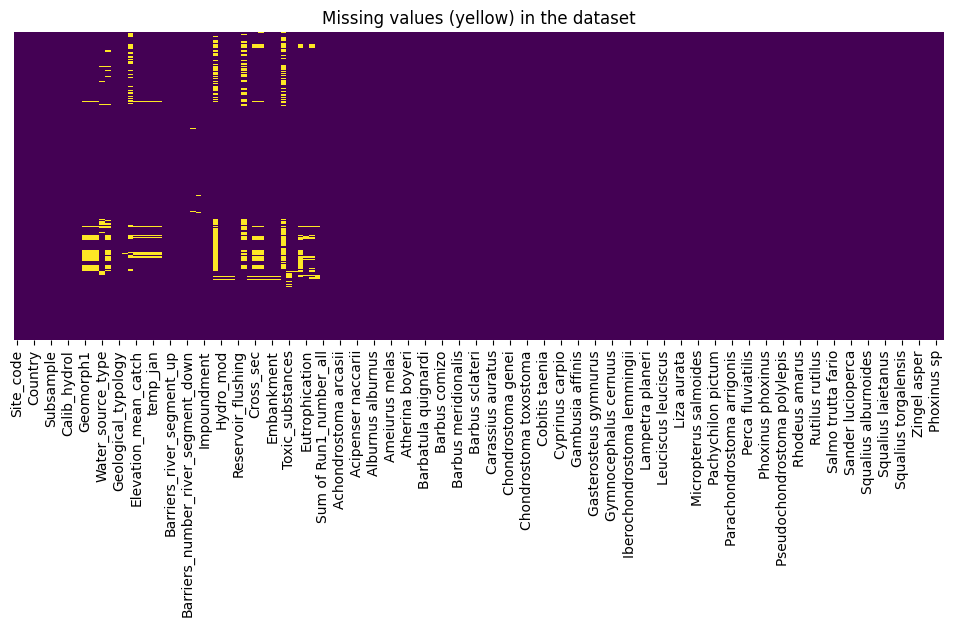

In [45]:
# a good way of detecting missing values in the dataset
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing values (yellow) in the dataset');

In [46]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

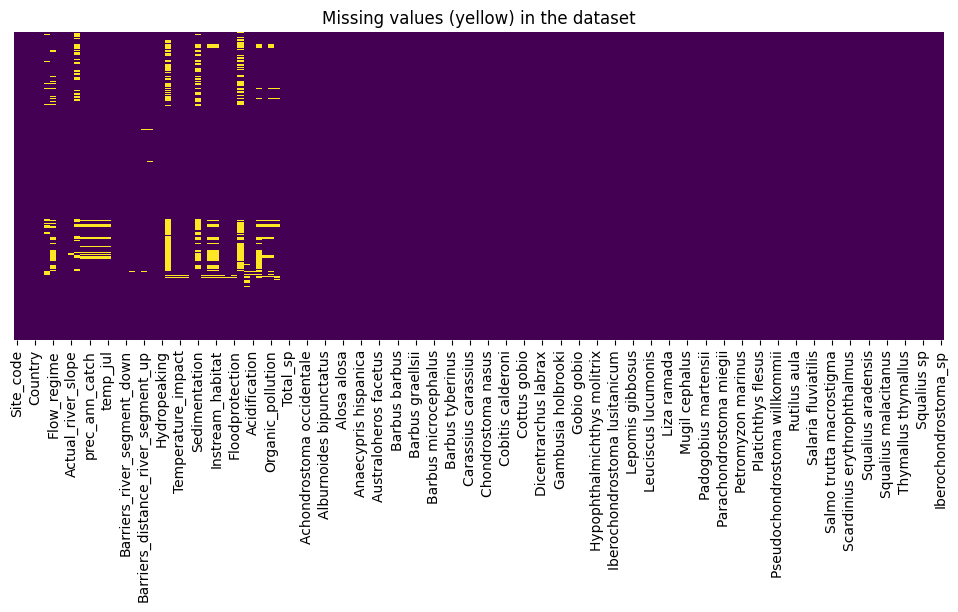

In [47]:
# a good way of detecting missing values in the dataset
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing values (yellow) in the dataset');

In [48]:
df2 = df.dropna()

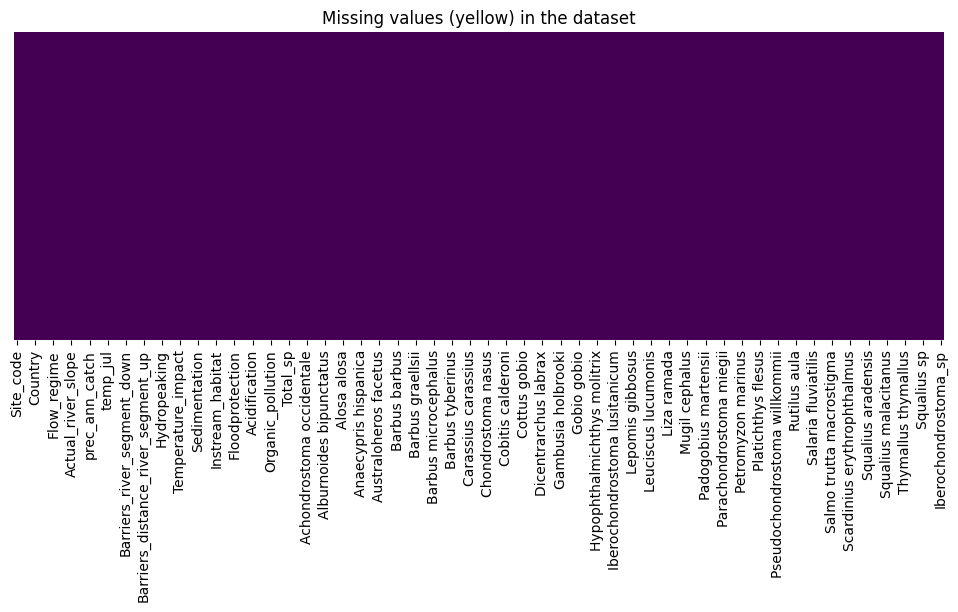

In [49]:
# a good way of detecting missing values in the dataset
plt.figure(figsize=(12,4))
sns.heatmap(df2.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing values (yellow) in the dataset');

In [50]:
temp_ann = df2['temp_ann'].dropna()

#### 5.1

In [51]:
# Calculate the mean and standard deviation
mean_temp_ann = temp_ann.mean()
std_temp_ann = temp_ann.std()

# Calculate the z-score
df['temp_ann_z'] = (df['temp_ann'] - mean_temp_ann) / std_temp_ann
df['temp_ann_z']



0       2.183844
1      -2.164499
2      -1.745382
3      -1.745382
4      -1.640602
          ...   
5006    0.769322
5007    0.821712
5008    0.821712
5009   -0.278471
5010    0.716933
Name: temp_ann_z, Length: 5011, dtype: float64

In [52]:
# Calculate new mean and SD for the standardized values
mean_temp_ann_z = df['temp_ann_z'].mean()
std_temp_ann_z = df['temp_ann_z'].std()



In [53]:
confidence_interval = stats.norm.interval(0.95, loc=mean_temp_ann_z, scale=std_temp_ann_z)

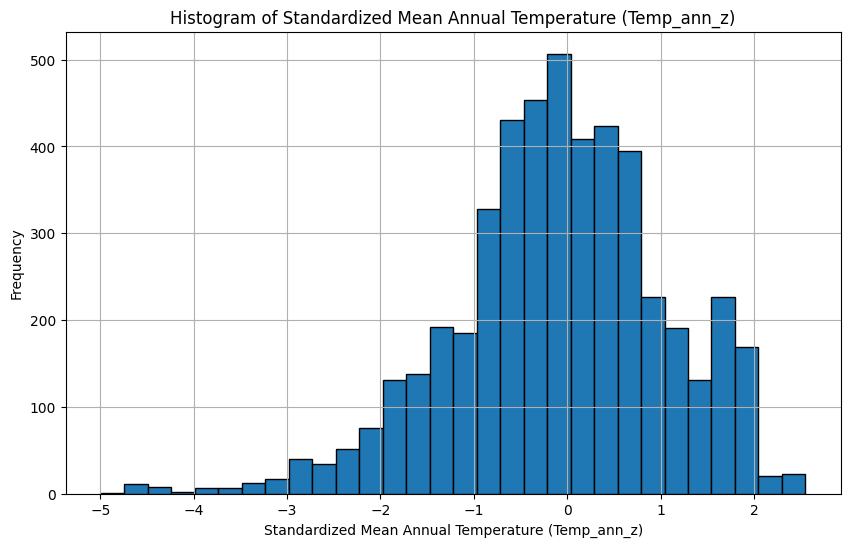

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(df['temp_ann_z'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Standardized Mean Annual Temperature (Temp_ann_z)')
plt.xlabel('Standardized Mean Annual Temperature (Temp_ann_z)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [55]:
mean_temp_ann_z, std_temp_ann_z, confidence_interval

(-0.08884655018725893,
 1.1380687669348173,
 (-2.3194203453094095, 2.1417272449348914))

In [56]:

# Calculating mean and standard deviation of the standardized temp_ann
Tst_mean = round(df['temp_ann_z'].mean())
Tst_SD = df['temp_ann_z'].std()

# Standard error
SE = Tst_SD / math.sqrt(len(df))

# Compute the 95% CI manually
lower = Tst_mean - 1.96 * SE
upper = Tst_mean + 1.96 * SE
manual_CI = (lower, upper)

# Using the scipy function norm.interval
CI_scipy = stats.norm.interval(0.95, Tst_mean, scale=SE)

# Assuming a t-distribution instead
CI_t_distribution = stats.t.interval(confidence=0.95, df=len(df)-1, loc=Tst_mean, scale=SE)

Tst_mean, Tst_SD, manual_CI, CI_scipy, CI_t_distribution



(0,
 1.1380687669348173,
 (-0.03151101371633743, 0.03151101371633743),
 (-0.03151043469406582, 0.03151043469406582),
 (-0.03151804910065462, 0.03151804910065462))

##### análise das temperaturas em comparação, baseada na correção do exercício feita pelo professor 

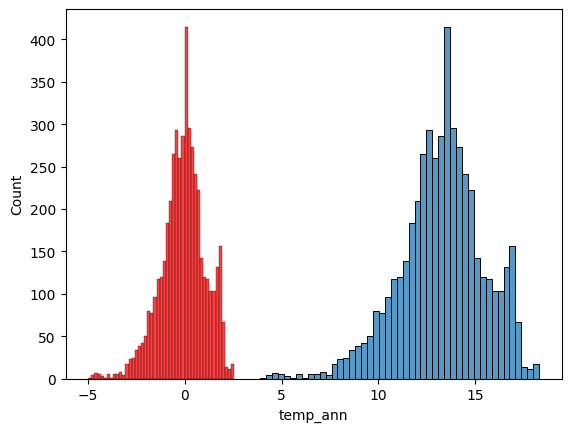

In [57]:
sns.histplot(df['temp_ann'])
sns.histplot(df['temp_ann_z'], color='red')
plt.show()

#### 5.2

##### T-test and Mann-Whitney U test para medias standardizadas e não standardizadas 

In [58]:


df['Salmo_trutta_fario_presence'] = df['Salmo trutta fario'].fillna(0).apply(lambda x: 1 if x > 0 else 0)


presence_temp_ann = df[df['Salmo_trutta_fario_presence'] == 1]['temp_ann'].dropna()
absence_temp_ann = df[df['Salmo_trutta_fario_presence'] == 0]['temp_ann'].dropna()


presence_temp_ann_z = df[df['Salmo_trutta_fario_presence'] == 1]['temp_ann_z'].dropna()
absence_temp_ann_z = df[df['Salmo_trutta_fario_presence'] == 0]['temp_ann_z'].dropna()

#  t-test for means (non-standardized)
t_stat, p_value_ttest = stats.ttest_ind(presence_temp_ann, absence_temp_ann)

#  Mann-Whitney U test for medians (non-standardized)
u_stat, p_value_mannwhitney = stats.mannwhitneyu(presence_temp_ann, absence_temp_ann)

# t-test for means (standardized)
t_stat_z, p_value_ttest_z = stats.ttest_ind(presence_temp_ann_z, absence_temp_ann_z)

# m Mann-Whitney U test for medians (standardized)
u_stat_z, p_value_mannwhitney_z = stats.mannwhitneyu(presence_temp_ann_z, absence_temp_ann_z)

# Display results
results = {
    "Test": ["T-test (Non-standardized)", "Mann-Whitney U (Non-standardized)", "T-test (Standardized)", "Mann-Whitney U (Standardized)"],
    "Test Statistic": [t_stat, u_stat, t_stat_z, u_stat_z],
    "P-value": [p_value_ttest, p_value_mannwhitney, p_value_ttest_z, p_value_mannwhitney_z]
}

results_df = pd.DataFrame(results)


print(results_df)


for index, row in results_df.iterrows():
    if row["P-value"] < 0.05:
        conclusion = "reject the null hypothesis"
    else:
        conclusion = "fail to reject the null hypothesis"
    print(f"For the {row['Test']}, we {conclusion} with a p-value of {row['P-value']:.2e}.")


                                Test  Test Statistic        P-value
0          T-test (Non-standardized)   -4.345438e+01   0.000000e+00
1  Mann-Whitney U (Non-standardized)    1.027812e+06  7.105075e-303
2              T-test (Standardized)   -4.345438e+01   0.000000e+00
3      Mann-Whitney U (Standardized)    1.027812e+06  7.105075e-303
For the T-test (Non-standardized), we reject the null hypothesis with a p-value of 0.00e+00.
For the Mann-Whitney U (Non-standardized), we reject the null hypothesis with a p-value of 7.11e-303.
For the T-test (Standardized), we reject the null hypothesis with a p-value of 0.00e+00.
For the Mann-Whitney U (Standardized), we reject the null hypothesis with a p-value of 7.11e-303.


#### 5.3

['Ebro', 'Galiza-Norte', 'Minho', 'Tejo', 'Cantabrica', 'Douro', 'Guadia', 'Catala']


<Axes: xlabel='Actual_river_slope', ylabel='Count'>

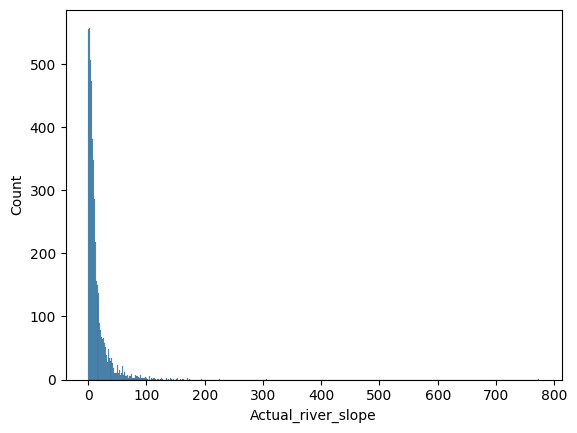

In [59]:

top_catchments = df['Catchment_name'].value_counts().nlargest(8).index.tolist()

print(top_catchments)

# Filter the data for these catchments
filtered_df = df[df['Catchment_name'].isin(top_catchments)]

sns.histplot(df['Actual_river_slope'])


In [68]:
# Perform ANOVA 
anova_result = stats.f_oneway(
    *[filtered_df[filtered_df['Catchment_name'] == catchment]['Elevation_mean_catch'].dropna()
      for catchment in top_catchments]
)

# Perform Tukey's HSD test
tukey_hsd = pairwise_tukeyhsd(endog=filtered_df['Elevation_mean_catch'],
                              groups=filtered_df['Catchment_name'],
                              alpha=0.05)

print(anova_result)
tukey_hsd.summary()

F_onewayResult(statistic=227.9539828360388, pvalue=1.3695264820345128e-285)


group1,group2,meandiff,p-adj,lower,upper,reject
Cantabrica,Catala,nan,nan,nan,nan,False
Cantabrica,Douro,nan,nan,nan,nan,False
Cantabrica,Ebro,nan,nan,nan,nan,False
Cantabrica,Galiza-Norte,nan,nan,nan,nan,False
Cantabrica,Guadia,nan,nan,nan,nan,False
Cantabrica,Minho,nan,nan,nan,nan,False
Cantabrica,Tejo,nan,nan,nan,nan,False
Catala,Douro,nan,nan,nan,nan,False
Catala,Ebro,nan,nan,nan,nan,False
Catala,Galiza-Norte,nan,nan,nan,nan,False


##### comparação de resultados com o metodo utilzado pelo professor na correçao

In [66]:


# Although the distribution of the mean elevation is right skewed and seems to depart from normality, we will nevertheless try to run ANOVA.
mod = ols('Elevation_mean_catch ~ Catchment_name', data=filtered_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)  # typ is the type of anova type to perform ('I','II' or 'III' = 1,2,3)

# Print ANOVA table
print(aov_table)  # provides the usual ANOVA table

# Decision rule
alpha = 0.05
p = aov_table['PR(>F)'][0]

if p <= alpha:
    print('Reject H0: mean elevation values are equal among catchments')
else:
    print('Fail to reject H0: mean elevation values are equal among catchments')


mean_elevation_by_catchment = filtered_df[['Elevation_mean_catch', 'Catchment_name']].groupby('Catchment_name').mean()



                      sum_sq      df           F         PR(>F)
Catchment_name  2.137395e+08     7.0  227.953983  1.369526e-285
Residual        5.315097e+08  3968.0         NaN            NaN
Reject H0: mean elevation values are equal among catchments


C:\Users\Damião\AppData\Local\Temp\ipykernel_15396\1214971193.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = aov_table['PR(>F)'][0]


In [65]:
print(mean_elevation_by_catchment)

                Elevation_mean_catch
Catchment_name                      
Cantabrica                656.245295
Catala                    706.433633
Douro                     924.403733
Ebro                     1123.675167
Galiza-Norte              471.965912
Guadia                    487.350581
Minho                     947.234759
Tejo                      824.568000


<Axes: xlabel='Catchment_name', ylabel='Actual_river_slope'>

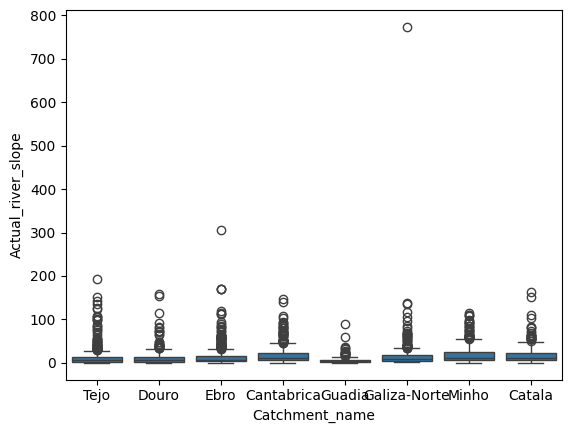

In [69]:
sns.boxplot(data=filtered_df, x='Catchment_name', y='Actual_river_slope')

#### 5.4

##### Potential problems:
1. Missing Values: Check for missing data points
2. Sampling Bias: Problems in the collection of the data:<br> Check the distribution of samples across catchments.<br> As said by the professor in the correction, the categories can be  highly unbalanced, very different in number, for example for each catchment site.<br> Lack of independency among sampling sites
3. Assumptions of Tests: ex: normality assumption

